In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer

In [3]:
Dataset = pd.read_csv('datasets-jadi.csv')
riilDataset = Dataset.drop(columns=['NO', 'NAMA', 'PE/Non PE'])

Dataset2 = pd.read_csv('datasets-jadi-MI.csv')
riilDataset2 = Dataset2.drop(columns=['PE/Non PE'])

# imputer = SimpleImputer(strategy='mean')
# riilDataset = pd.DataFrame(imputer.fit_transform(riilDataset), columns=riilDataset.columns)

X2 = riilDataset # Features
y2 = Dataset['PE/Non PE'] # Target variable

X4 = riilDataset2 # Features
y4 = Dataset2['PE/Non PE'] # Target variable

In [4]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NO                                      561 non-null    int64  
 1   NAMA                                    561 non-null    object 
 2   USIA                                    561 non-null    float64
 3   PARITAS                                 561 non-null    int64  
 4   JARAK KELAHIRAN                         561 non-null    int64  
 5   PE/Non PE                               561 non-null    int64  
 6   RIW HIPERTENSI_Tidak                    561 non-null    float64
 7   RIW HIPERTENSI_Ya                       561 non-null    float64
 8   RIW PE_Ada                              561 non-null    float64
 9   RIW PE_Tidak                            561 non-null    float64
 10  OBESITAS_Tidak                          561 non-null    float6

In [5]:
Dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   USIA                                    561 non-null    float64
 1   PARITAS                                 561 non-null    int64  
 2   RIW HIPERTENSI_Tidak                    561 non-null    float64
 3   RIW HIPERTENSI_Ya                       561 non-null    float64
 4   RIW PE_Ada                              561 non-null    float64
 5   RIW PE_Tidak                            561 non-null    float64
 6   OBESITAS_Tidak                          561 non-null    float64
 7   RIW DM_Tidak                            561 non-null    float64
 8   RIW HIPERTENSI/PE DALAM KELUARGA_Ada    561 non-null    float64
 9   RIW HIPERTENSI/PE DALAM KELUARGA_Tidak  561 non-null    float64
 10  SOSEK RENDAH_<UMR                       561 non-null    float6

In [6]:
nan_check = Dataset.isna().any()

# Display columns that have NaN values
columns_with_nan = nan_check[nan_check].index.tolist()

if columns_with_nan:
    print("Columns with NaN values:", columns_with_nan)
else:
    print("No NaN values found in the DataFrame.")

No NaN values found in the DataFrame.


In [7]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=1) # 80% training and 20% test
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.20, random_state=1) # 80% training and 20% test

In [8]:
X_train2.shape, X_test2.shape, X_train4.shape, X_test4.shape

((448, 15), (113, 15), (448, 11), (113, 11))

In [9]:
# Count occurrences of each unique value (0 and 1)
unique, counts = np.unique(y_test2, return_counts=True)

# Create a dictionary to display the count results
count_dict = dict(zip(unique, counts))
print("Counts of each unique value in y_test2:", count_dict)

Counts of each unique value in y_test2: {0: 110, 1: 3}


In [10]:
# Count occurrences of each unique value (0 and 1)
unique, counts = np.unique(y_test4, return_counts=True)

# Create a dictionary to display the count results
count_dict = dict(zip(unique, counts))
print("Counts of each unique value in y_test4:", count_dict)

Counts of each unique value in y_test4: {0: 110, 1: 3}


In [11]:
# Count occurrences of each unique value (0 and 1)
unique, counts = np.unique(y_train2, return_counts=True)

# Create a dictionary to display the count results
count_dict = dict(zip(unique, counts))
print("Counts of each unique value in y_train2:", count_dict)

Counts of each unique value in y_train2: {0: 410, 1: 38}


In [12]:
# Count occurrences of each unique value (0 and 1)
unique, counts = np.unique(y_train4, return_counts=True)

# Create a dictionary to display the count results
count_dict = dict(zip(unique, counts))
print("Counts of each unique value in y_train4:", count_dict)

Counts of each unique value in y_train4: {0: 410, 1: 38}


In [13]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from scipy.stats import chi2_contingency
import numpy as np

def evaluate_performance(y_train, y_pred_train, y_test, y_pred_test, classifier_name):
  # Accuracy
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    
    # Recall / Sensitivity
    recall_train = recall_score(y_train, y_pred_train, average='weighted')
    recall_test = recall_score(y_test, y_pred_test, average='weighted')
    
    # Precision
    precision_train = precision_score(y_train, y_pred_train, average='weighted', zero_division=0)
    precision_test = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
    
    # F1 Score
    f1_train = f1_score(y_train, y_pred_train, average='weighted')
    f1_test = f1_score(y_test, y_pred_test, average='weighted')
    
    # Confusion Matrix
    conf_matrix_train = confusion_matrix(y_train, y_pred_train)
    conf_matrix_test = confusion_matrix(y_test, y_pred_test)
    
    # Specificity and G-Mean for train set
    specificity_train = np.mean(np.diag(conf_matrix_train) / np.sum(conf_matrix_train, axis=1))
    g_mean_train = np.sqrt(recall_train * specificity_train)
    
    # Specificity and G-Mean for test set
    specificity_test = np.mean(np.diag(conf_matrix_test) / np.sum(conf_matrix_test, axis=1))
    g_mean_test = np.sqrt(recall_test * specificity_test)
    
    # P-Value using chi-squared test for train set with continuity correction
    try:
        chi2_train, p_value_train, _, _ = chi2_contingency(conf_matrix_train, correction=True)
    except ValueError as e:
        p_value_train = np.nan  # Assign NaN if chi-squared test fails
    
    # P-Value using chi-squared test for test set with continuity correction
    try:
        chi2_test, p_value_test, _, _ = chi2_contingency(conf_matrix_test, correction=True)
    except ValueError as e:
        p_value_test = np.nan  # Assign NaN if chi-squared test fails
    
    # Check if p-value is NaN and provide a warning or alternative
    if np.isnan(p_value_train):
        print(f"Warning: P-value for training set in {classifier_name} is NaN due to invalid chi-squared test.")
    if np.isnan(p_value_test):
        print(f"Warning: P-value for test set in {classifier_name} is NaN due to invalid chi-squared test.")
    
    
    # Print results
    print(f"{classifier_name} Performance:")
    print(f"Accuracy (Training set): {accuracy_train:.4f}")
    print(f"Accuracy (Test set): {accuracy_test:.4f}")
    print(f"Recall (Sensitivity) (Training set): {recall_train:.4f}")
    print(f"Recall (Sensitivity) (Test set): {recall_test:.4f}")
    print(f"Precision (Training set): {precision_train:.4f}")
    print(f"Precision (Test set): {precision_test:.4f}")
    print(f"F1 Score (Training set): {f1_train:.4f}")
    print(f"F1 Score (Test set): {f1_test:.4f}")
    print(f"Specificity (Training set): {specificity_train:.4f}")
    print(f"Specificity (Test set): {specificity_test:.4f}")
    print(f"G-Mean (Training set): {g_mean_train:.4f}")
    print(f"G-Mean (Test set): {g_mean_test:.4f}")
    print(f"P-Value (Training set): {p_value_train:.4e}")
    print(f"P-Value (Test set): {p_value_test:.4e}")
    print('')

## Proses D-Tree

In [14]:
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [15]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [16]:
tree_train2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)
tree_train2 = tree_train2.fit(X_train2, y_train2)

tree_train4 = DecisionTreeClassifier(criterion="entropy", max_depth=3)
tree_train4 = tree_train4.fit(X_train4, y_train4)

tree_pred2 = tree_train2.predict(X_test2)

tree_pred4 = tree_train4.predict(X_test4)

[[109   1]
 [  2   1]]
[[109   1]
 [  2   1]]
[0.98642534 0.4       ]
[0.98642534 0.4       ]
Accuracy6: 0.9734513274336283
Accuracy66: 0.9734513274336283


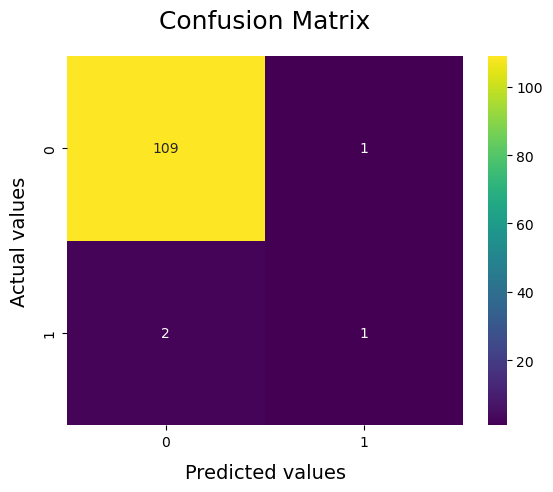

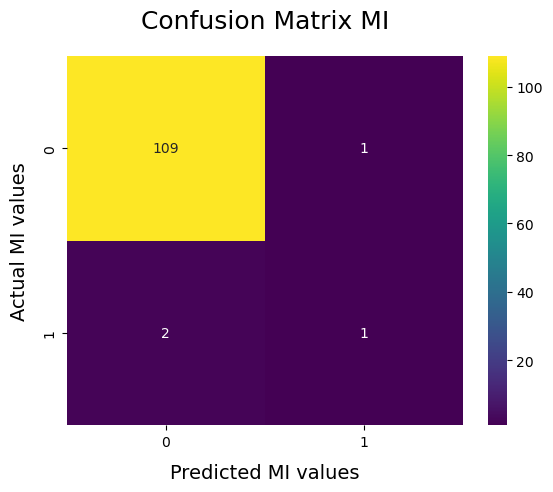

In [17]:
cm6 = confusion_matrix(y_test2, tree_pred2)
print(cm6)

cm66 = confusion_matrix(y_test4, tree_pred4)
print(cm66)

accuracy6 = f1_score(y_test2, tree_pred2, average=None)
print(accuracy6)
accuracy66 = f1_score(y_test4, tree_pred4, average=None)
print(accuracy66)

print("Accuracy6:",metrics.accuracy_score(y_test2, tree_pred2))
print("Accuracy66:",metrics.accuracy_score(y_test4, tree_pred4))

sns.heatmap(confusion_matrix(y_test2, tree_pred2), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

sns.heatmap(confusion_matrix(y_test4, tree_pred4), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted MI values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual MI values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix MI", fontdict = {'size':18}, pad = 20)
plt.show()

In [18]:
y_pred_tree_train2 = tree_train2.predict(X_train2)
y_pred_tree_test2 = tree_train2.predict(X_test2)

y_pred_tree_train4 = tree_train4.predict(X_train4)
y_pred_tree_test4 = tree_train4.predict(X_test4)

# Evaluate performance for both classifiers
evaluate_performance(y_train2, y_pred_tree_train2, y_test2, y_pred_tree_test2, "Classifier ORI 2")
evaluate_performance(y_train4, y_pred_tree_train4, y_test4, y_pred_tree_test4, "Classifier MI 2")

Classifier ORI 2 Performance:
Accuracy (Training set): 0.9464
Accuracy (Test set): 0.9735
Recall (Sensitivity) (Training set): 0.9464
Recall (Sensitivity) (Test set): 0.9735
Precision (Training set): 0.9431
Precision (Test set): 0.9692
F1 Score (Training set): 0.9443
F1 Score (Test set): 0.9709
Specificity (Training set): 0.7917
Specificity (Test set): 0.6621
G-Mean (Training set): 0.8656
G-Mean (Test set): 0.8028
P-Value (Training set): 8.5282e-39
P-Value (Test set): 4.7329e-02

Classifier MI 2 Performance:
Accuracy (Training set): 0.9464
Accuracy (Test set): 0.9735
Recall (Sensitivity) (Training set): 0.9464
Recall (Sensitivity) (Test set): 0.9735
Precision (Training set): 0.9431
Precision (Test set): 0.9692
F1 Score (Training set): 0.9443
F1 Score (Test set): 0.9709
Specificity (Training set): 0.7917
Specificity (Test set): 0.6621
G-Mean (Training set): 0.8656
G-Mean (Test set): 0.8028
P-Value (Training set): 8.5282e-39
P-Value (Test set): 4.7329e-02



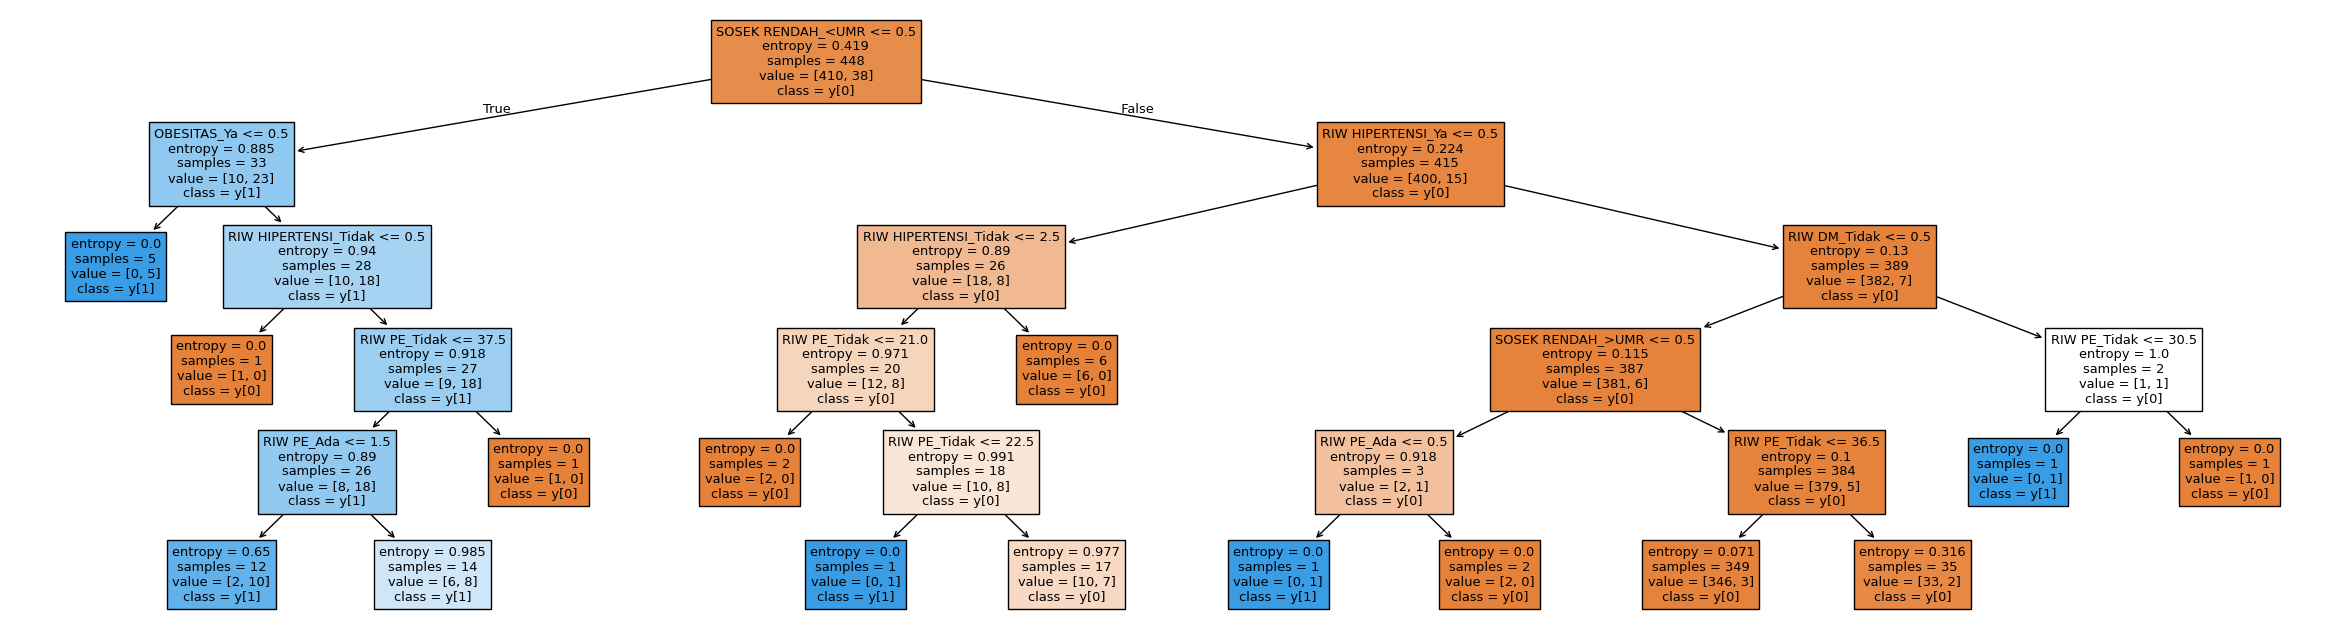

|--- SOSEK RENDAH_<UMR <= 0.50
|   |--- OBESITAS_Ya <= 0.50
|   |   |--- class: 1
|   |--- OBESITAS_Ya >  0.50
|   |   |--- RIW HIPERTENSI_Tidak <= 0.50
|   |   |   |--- class: 0
|   |   |--- RIW HIPERTENSI_Tidak >  0.50
|   |   |   |--- RIW PE_Tidak <= 37.50
|   |   |   |   |--- RIW PE_Ada <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- RIW PE_Ada >  1.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- RIW PE_Tidak >  37.50
|   |   |   |   |--- class: 0
|--- SOSEK RENDAH_<UMR >  0.50
|   |--- RIW HIPERTENSI_Ya <= 0.50
|   |   |--- RIW HIPERTENSI_Tidak <= 2.50
|   |   |   |--- RIW PE_Tidak <= 21.00
|   |   |   |   |--- class: 0
|   |   |   |--- RIW PE_Tidak >  21.00
|   |   |   |   |--- RIW PE_Tidak <= 22.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- RIW PE_Tidak >  22.50
|   |   |   |   |   |--- class: 0
|   |   |--- RIW HIPERTENSI_Tidak >  2.50
|   |   |   |--- class: 0
|   |--- RIW HIPERTENSI_Ya >  0.50
|   |   |--- RIW DM_Tidak <= 0.50
|   |   |   |---

In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

# Training the decision tree
tree_train2 = DecisionTreeClassifier(criterion="entropy", max_depth=5)
tree_train2 = tree_train2.fit(X_train2, y_train2)

# List of feature names
feature_names = ['RIW PE_Tidak'
,'RIW HIPERTENSI_Tidak'
,'RIW PE_Ada'
,'RIW HIPERTENSI_Ya'
,'RIW HIPERTENSI/PE DALAM KELUARGA_Ada'
,'OBESITAS_Tidak'
,'SOSEK RENDAH_<UMR'
,'USIA'
,'RIW HIPERTENSI/PE DALAM KELUARGA_Tidak'
,'PARITAS'
,'RIW DM_Tidak'
,'JARAK KELAHIRAN'
,'OBESITAS_Ya'
,'RIW DM_Ya'
,'SOSEK RENDAH_>UMR']

# Visualizing the tree
plt.figure(figsize=(30, 8))
plot_tree(tree_train2, feature_names=feature_names, class_names=True, filled=True)

# Save the tree visualization as a .png file
plt.savefig('tree_visualization.png', format='png', dpi=300)

# Show the plot
plt.show()

# Displaying the rules
tree_rules = export_text(tree_train2, feature_names=feature_names)
print(tree_rules)

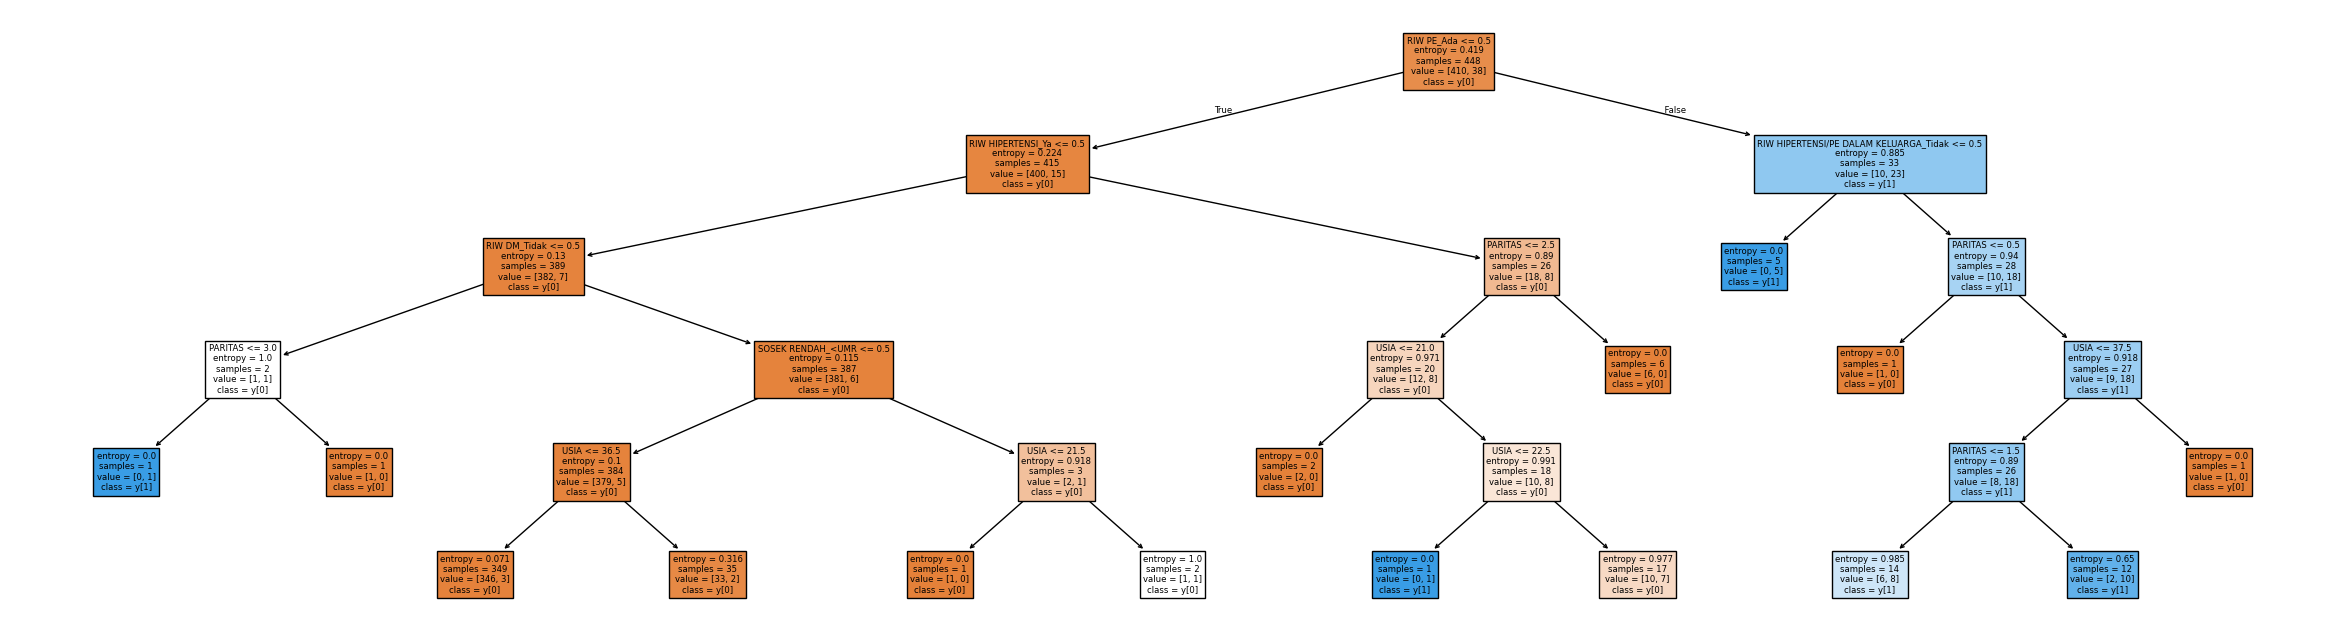

|--- RIW PE_Ada <= 0.50
|   |--- RIW HIPERTENSI_Ya <= 0.50
|   |   |--- RIW DM_Tidak <= 0.50
|   |   |   |--- PARITAS <= 3.00
|   |   |   |   |--- class: 1
|   |   |   |--- PARITAS >  3.00
|   |   |   |   |--- class: 0
|   |   |--- RIW DM_Tidak >  0.50
|   |   |   |--- SOSEK RENDAH_<UMR <= 0.50
|   |   |   |   |--- USIA <= 36.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- USIA >  36.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- SOSEK RENDAH_<UMR >  0.50
|   |   |   |   |--- USIA <= 21.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- USIA >  21.50
|   |   |   |   |   |--- class: 0
|   |--- RIW HIPERTENSI_Ya >  0.50
|   |   |--- PARITAS <= 2.50
|   |   |   |--- USIA <= 21.00
|   |   |   |   |--- class: 0
|   |   |   |--- USIA >  21.00
|   |   |   |   |--- USIA <= 22.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- USIA >  22.50
|   |   |   |   |   |--- class: 0
|   |   |--- PARITAS >  2.50
|   |   |   |--- class: 0
|--- RIW PE_Ada >  0.50
|   |--- RIW

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

# Training the decision tree
tree_train4 = DecisionTreeClassifier(criterion="entropy", max_depth=5)
tree_train4 = tree_train4.fit(X_train4, y_train4)

# List of feature names
feature_names = [
'USIA'
,'PARITAS'
,'RIW HIPERTENSI_Tidak'
,'RIW HIPERTENSI_Ya'
,'RIW PE_Ada'
,'RIW PE_Tidak'
,'OBESITAS_Tidak'
,'RIW DM_Tidak'
,'RIW HIPERTENSI/PE DALAM KELUARGA_Ada'
,'RIW HIPERTENSI/PE DALAM KELUARGA_Tidak'
,'SOSEK RENDAH_<UMR'
]

# Visualizing the tree
plt.figure(figsize=(30, 8))
plot_tree(tree_train4, feature_names=feature_names, class_names=True, filled=True)

# Save the tree visualization as a .png file
plt.savefig('tree_visualization-MI.png', format='png', dpi=300)

# Show the plot
plt.show()

# Displaying the rules
tree_rules = export_text(tree_train4, feature_names=feature_names)
print(tree_rules)
